In [38]:
import osmnx as ox
import matplotlib.pyplot as plt
import pandas as pd

In this notebook, random shelter files will be generated from osm data from a target location, to check the steps of how it works. Firstly, I have exported dataset for patuakhali barguna from osm, then converted it to geojson file in JOSM, so that I can do the necessary preprocessing.

In [4]:
import geopandas as gpd

In [5]:
patuakhali=gpd.read_file('patuakhali.geojson')

In [17]:
patuakhali.head()

,access,alt_name,amenity,bicycle,boundary,bridge,building,foot,ford,hgv,...,tourist_bus,type,usage,vehicle,waterway,wetland,wikidata,wikipedia,wikipedia:bn,geometry
0,NaN,NaN,NaN,NaN,protected_area,NaN,NaN,NaN,NaN,NaN,...,NaN,multipolygon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((90.21817 21.82038, 90.21743 21..."
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (90.11798 21.81547)
2,NaN,NaN,NaN,yes,NaN,NaN,NaN,yes,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"LINESTRING (90.12168 21.81611, 90.12207 21.816..."
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((90.11065 21.82552, 90.11076 21.82556..."
4,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((90.14074 21.81125, 90.14080 21.81123..."


In [8]:
#print(patuakhali.value_counts)

In [10]:
from shapely import Point

after checking the current data, it can be seen that, the latitude and longitude is in the geometry, now we have to fetch this values and create two new columns in the dataset named latitude and logitude.but as it can be seen below, the rows have different numbers of coordinates, we will use centroid funtion to fetch the lattitude and longitude and specifically target the building and amenity data because the shelters will be definitley be in the buildings or amenity(school or others). so what i am going to do is, create a new dataframe with columnns -> buildings, amenity and geometry, and then go from there.

In [12]:
patuakhali['geometry'].head()

0    MULTIPOLYGON (((90.21817 21.82038, 90.21743 21...
1                            POINT (90.11798 21.81547)
2    LINESTRING (90.12168 21.81611, 90.12207 21.816...
3    POLYGON ((90.11065 21.82552, 90.11076 21.82556...
4    POLYGON ((90.14074 21.81125, 90.14080 21.81123...
Name: geometry, dtype: geometry

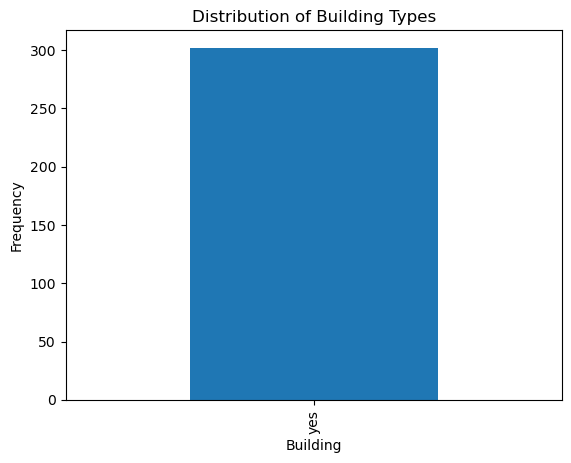

In [22]:
# Count the frequency of each category in the 'building' column
building_counts = patuakhali['building'].value_counts()

# Create a bar plot
building_counts.plot(kind='bar')
plt.xlabel('Building')
plt.ylabel('Frequency')
plt.title('Distribution of Building Types')
plt.show()

In [21]:
patuakhali.dtypes

access                object
alt_name              object
amenity               object
bicycle               object
boundary              object
bridge                object
building              object
foot                  object
ford                  object
hgv                   object
highway               object
horse                 object
landuse               object
lanes                 object
layer                 object
leisure               object
lock                  object
maxspeed              object
motorcycle            object
motor_vehicle         object
name                  object
name:bn               object
name:en               object
natural               object
operator              object
operator:type         object
place                 object
protect_class         object
protection_title      object
ref                   object
ref:WDPA              object
sidewalk              object
source                object
surface               object
tourist_bus   

In [24]:
building_counts

yes    302
Name: building, dtype: int64

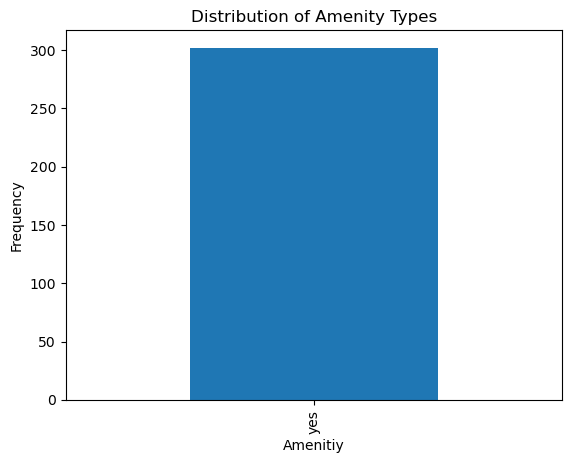

In [25]:
# Count the frequency of each category in the 'building' column
amenity_counts = patuakhali['amenity'].value_counts()

# Create a bar plot
building_counts.plot(kind='bar')
plt.xlabel('Amenitiy')
plt.ylabel('Frequency')
plt.title('Distribution of Amenity Types')
plt.show()

In [26]:
amenity_counts

bus_station    1
Name: amenity, dtype: int64

As there isn't sufficient data in the amenity column, i will only include building and geometry in the new dataframe

In [27]:
filtered_pk=patuakhali.loc[patuakhali['building']=='yes',['building','geometry']].copy()

In [28]:
filtered_pk.head()

,building,geometry
4,yes,"POLYGON ((90.14074 21.81125, 90.14080 21.81123..."
5,yes,"POLYGON ((90.12740 21.81443, 90.12748 21.81442..."
7,yes,"POLYGON ((90.13603 21.81305, 90.13607 21.81305..."
9,yes,"POLYGON ((90.14291 21.81076, 90.14298 21.81076..."
10,yes,"POLYGON ((90.12096 21.81518, 90.12086 21.81520..."


In [29]:
import random
import folium

In [35]:
#creating an empty dictionary for shelter data
shelter_data = {
    'shelter_name': [],  
    'shelter_capacity': [], 
    'geometry': [] 
}

In [30]:
#randomly selecting buildings for shelter
num_shelters=30
selected_buildings = random.sample(range(len(filtered_pk)), num_shelters)

In [32]:
#selected_buildings

In [36]:
for i in range(num_shelters):
    shelter_name = f'Shelter {i + 1}'  # You can customize the naming convention
    shelter_capacity = random.randint(50, 200)  # Adjust the capacity range as needed
    shelter_geometry = filtered_pk.iloc[selected_buildings[i]]['geometry']
    
    # Append shelter data to the list
    shelter_data['shelter_name'].append(shelter_name)
    shelter_data['shelter_capacity'].append(shelter_capacity)
    shelter_data['geometry'].append(shelter_geometry)

In [39]:
# Creating a DataFrame from the shelter data
shelter_df = pd.DataFrame(shelter_data)

In [40]:
shelter_df.head()

,shelter_name,shelter_capacity,geometry
0,Shelter 1,144,"POLYGON ((90.1277636 21.8142399, 90.1277231 21..."
1,Shelter 2,55,"POLYGON ((90.1214343 21.8160558, 90.1215817 21..."
2,Shelter 3,157,"POLYGON ((90.1429892 21.8106297, 90.1429933 21..."
3,Shelter 4,179,"POLYGON ((90.1251206 21.816031, 90.1251213 21...."
4,Shelter 5,136,"POLYGON ((90.1416188 21.810835, 90.1416296 21...."


In [42]:
output_shapefile = 'shelters.shp'

In [44]:
gdf_shelters = gpd.GeoDataFrame(shelter_df, geometry='geometry')

In [45]:
gdf_shelters.to_file(output_shapefile)

C:\Users\Hp\AppData\Local\Temp\ipykernel_28692\321215460.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_shelters.to_file(output_shapefile)


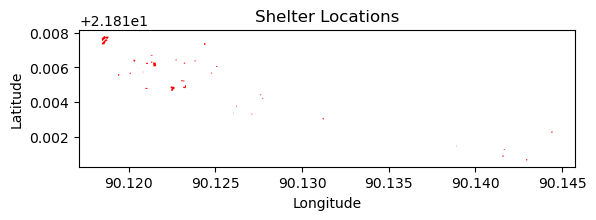

In [46]:
# Plot the shelters
gdf_shelters.plot(marker='o', color='red', markersize=5)

# Customize the plot (optional)
plt.title('Shelter Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()

In [58]:
""" #putting them on the map
m = folium.Map(location=[21.8, 90.2], zoom_start=10)
gdf_json = gdf_shelters.to_json()
# Create a GeoJson layer and add it to the map
geojson = folium.GeoJson(gdf_json)
geojson.add_to(m)"""

' #putting them on the map\nm = folium.Map(location=[21.8, 90.2], zoom_start=10)\ngdf_json = gdf_shelters.to_json()\n# Create a GeoJson layer and add it to the map\ngeojson = folium.GeoJson(gdf_json)\ngeojson.add_to(m)'

In [59]:
for index, row in gdf_shelters.iterrows():
    shelter_name = row['shelter_name']
    shelter_capacity = row['shelter_capacity']
    shelter_coords = [row['geometry'].centroid.y, row['geometry'].centroid.x]  # Get shelter coordinates

    # Create a custom marker with shelter name and capacity
    marker = folium.Marker(
        location=shelter_coords,
        popup=f'Shelter Name: {shelter_name}<br>Capacity: {shelter_capacity}',
    )
    
    marker.add_to(m)


In [60]:
m.save('shelters_map.html')